<a href="https://colab.research.google.com/github/Vedanshimishra/DSA/blob/main/Demand_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
center_info = pd.read_csv('/content/Centre_info.csv')
meal_info = pd.read_csv('/content/food_info.csv')
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

In [ ]:
centre_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


In [ ]:
food_info

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian
8,1803,Extras,Thai
9,1198,Extras,Thai


In [ ]:
merge1 = pd.merge(train_data, center_info, how='inner', on='center_id')
df = pd.merge(merge1, meal_info, how='inner', on='meal_id')
df.describe()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.096960e+05,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000,409696.000000
mean,1.249978e+06,67.496749,82.139379,2023.687539,331.290919,353.330266,0.082727,0.110589,264.406914,601.586098,56.602403,4.082756
std,1.443948e+05,37.473478,45.996650,547.367915,153.246634,160.754583,0.275470,0.313623,400.908608,66.185263,17.635751,1.091205
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000
25%,1.124831e+06,35.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000
50%,1.249948e+06,68.000000,76.000000,1971.000000,292.030000,309.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000
75%,1.375048e+06,100.000000,110.000000,2539.000000,443.320000,459.810000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,131.000000,186.000000,2956.000000,767.330000,767.330000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
df = df.sort_values(by=['week'])
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

id
Unique Values: 409696
id
1379560    1
1224235    1
1345487    1
1190164    1
1070477    1
          ..
1471581    1
1166122    1
1162861    1
1225521    1
1393656    1
Name: count, Length: 409696, dtype: int64
week
Unique Values: 131
week
122.0    3359
105.0    3348
106.0    3347
123.0    3331
113.0    3312
         ... 
12.0     2831
14.0     2830
7.0      2795
8.0      2786
131.0    2453
Name: count, Length: 131, dtype: int64
center_id
Unique Values: 77
center_id
13.0     6333
52.0     6288
10.0     6252
43.0     6219
67.0     6212
         ... 
139.0    4171
57.0     4045
162.0    3934
41.0     3674
91.0     3046
Name: count, Length: 77, dtype: int64
meal_id
Unique Values: 51
meal_id
2290.0    10041
1062.0    10040
1727.0    10039
1109.0    10037
1754.0    10035
1778.0    10027
2707.0    10026
1993.0    10019
1962.0    10017
1971.0    10009
1885.0     9996
2581.0     9979
2826.0     9960
2322.0     9917
1558.0     9855
1207.0     9726
2640.0     9706
1230.0     9683
1878.0     95

In [ ]:
num_cols=['center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'city_code',
 'region_code',
 'op_area']

In [ ]:
colors=['#b84949', '#ff6f00', '#ffbb00', '#9dff00', '#329906', '#439c55', '#67c79e', '#00a1db', '#002254', '#5313c2', '#c40fdb', '#e354aa']

In [ ]:
ts_tot_orders = df.groupby(['week'])['num_orders'].sum()
ts_tot_orders = pd.DataFrame(ts_tot_orders)
ts_tot_orders

,num_orders
week,
1.0,792261.0
2.0,787084.0
3.0,695262.0
4.0,743529.0
5.0,1198675.0
...,...
127.0,762737.0
128.0,878397.0
129.0,843661.0


In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
    )
]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
center_id = df.groupby(['center_id'])['num_orders'].sum()
center_id = pd.DataFrame(center_id)

In [ ]:
center_id=center_id.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(center_id, x="center_id", y="num_orders", color='center_id')
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})

fig.show()

In [ ]:
meal_id = df.groupby(['meal_id'])['num_orders'].sum()
meal_id = pd.DataFrame(meal_id)
meal_id=meal_id.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(meal_id, x="meal_id", y="num_orders")
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(1, 1, 1, 1)',
})

fig.show()

In [ ]:
cat_var = ['center_type',
 'category',
 'cuisine']

In [ ]:
center_type = df.groupby(['center_type'])['num_orders'].sum()
center_type = pd.DataFrame(center_type)

In [ ]:
center_type


,num_orders
center_type,
TYPE_A,62628590.0
TYPE_B,27055727.0
TYPE_C,18642138.0


In [ ]:
center_type=center_type.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(center_type, x="center_type", y="num_orders", color='center_type')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})

fig.show()

In [ ]:
category = df.groupby(['category'])['num_orders'].sum()
category = pd.DataFrame(category)

In [ ]:
category = category.reset_index()


In [ ]:
import plotly.express as px
fig = px.bar(category, x="category", y="num_orders", color='category')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})
fig.show()

In [ ]:
cuisine = df.groupby(['cuisine'])['num_orders'].sum()
cuisine = pd.DataFrame(cuisine)
cuisine = cuisine.reset_index()
import plotly.express as px
fig = px.bar(cuisine, x="cuisine", y="num_orders", color='cuisine')
fig.update_layout({
'plot_bgcolor': 'rgba(1, 1, 1, 1)',
'paper_bgcolor': 'rgba(0,0,0,0)',
})
fig.show()

In [ ]:
cat_ct=df.groupby(['category', 'center_type'])['num_orders'].sum()
cat_ct = cat_ct.unstack().fillna(0)
cat_ct

center_type,TYPE_A,TYPE_B,TYPE_C
category,,,
Beverages,22445810.0,8434240.0,5910479.0
Biryani,309579.0,203474.0,49891.0
Desert,882085.0,524171.0,297382.0
Extras,2155718.0,1130920.0,323558.0
Fish,363302.0,282836.0,21154.0
Other Snacks,2471734.0,1575490.0,266121.0
Pasta,808600.0,481606.0,191549.0
Pizza,3712637.0,1402084.0,1440291.0
Rice Bowl,10719663.0,4978404.0,3173098.0


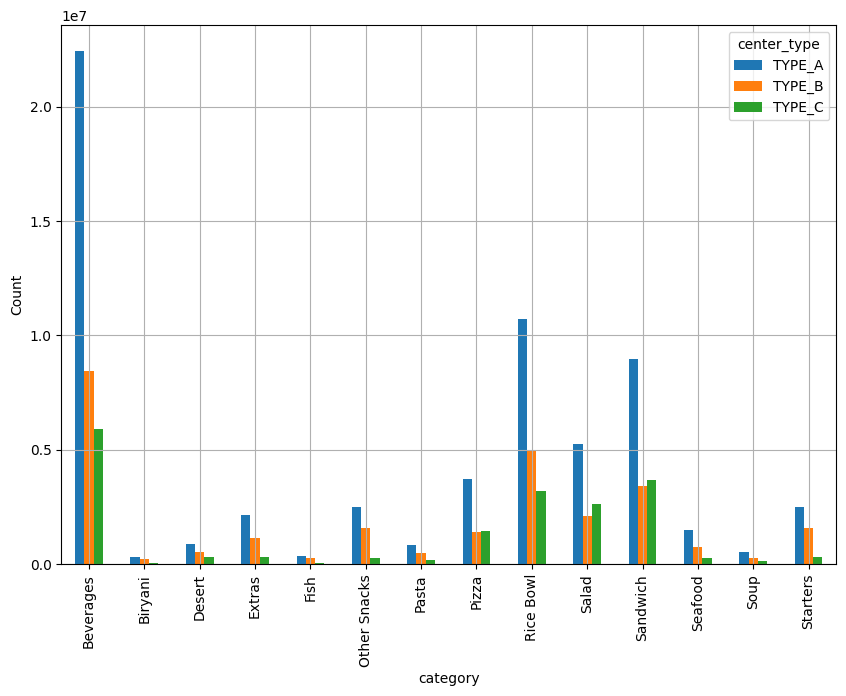

In [ ]:
# Visualize this data in bar plot
ax = (cat_ct).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [ ]:
cat_cu=df.groupby(['category', 'cuisine'])['num_orders'].sum()
cat_cu = cat_cu.unstack().fillna(0)
cat_cu

cuisine,Continental,Indian,Italian,Thai
category,,,,
Beverages,5493646.0,2071407.0,12547251.0,16678225.0
Biryani,0.0,562944.0,0.0,0.0
Desert,0.0,1703638.0,0.0,0.0
Extras,0.0,0.0,0.0,3610196.0
Fish,667292.0,0.0,0.0,0.0
Other Snacks,0.0,0.0,0.0,4313345.0
Pasta,0.0,0.0,1481755.0,0.0
Pizza,6555012.0,0.0,0.0,0.0
Rice Bowl,0.0,18871165.0,0.0,0.0


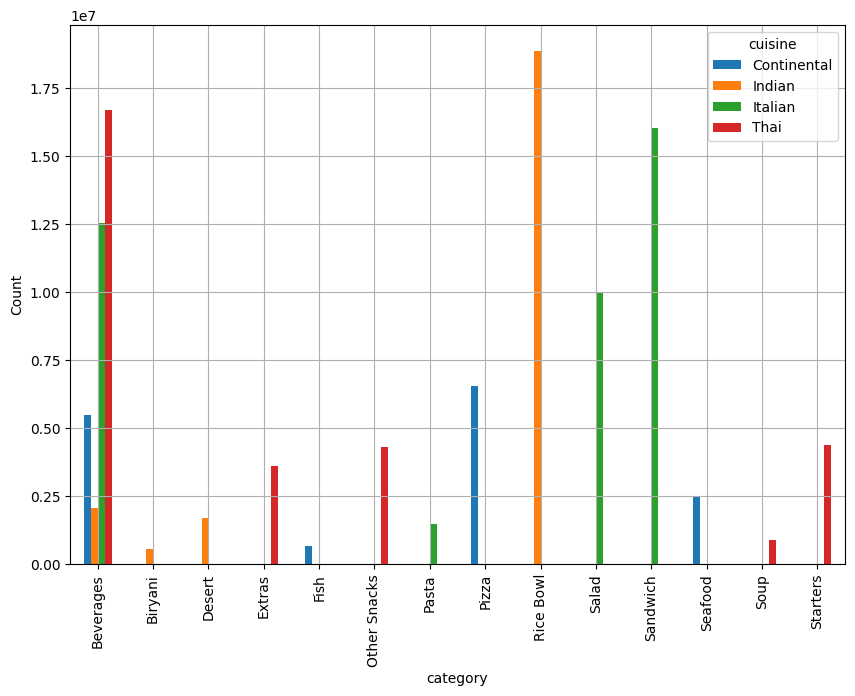

In [ ]:
# Visualize this data in bar plot
ax = (cat_cu).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

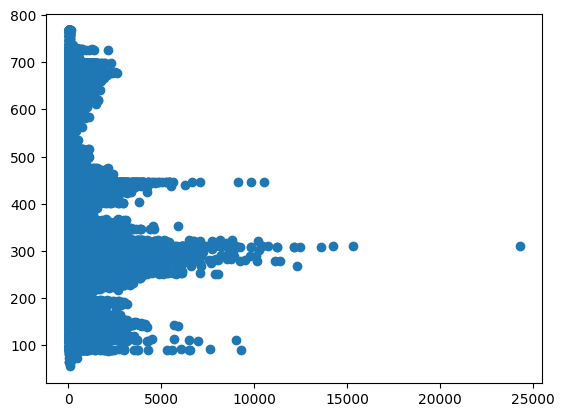

In [ ]:
x = df['num_orders']
y = df['base_price']

plt.scatter(x, y)
plt.show()

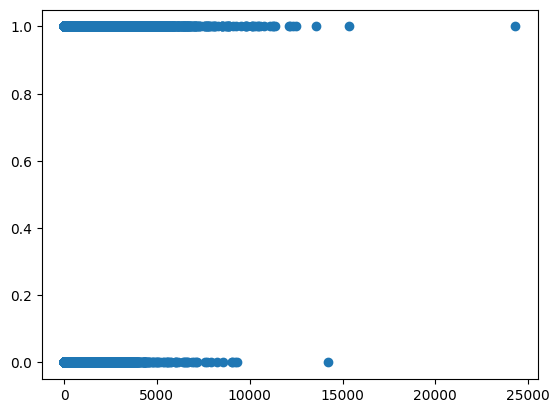

In [ ]:
x = df['num_orders']
y = df['emailer_for_promotion']

plt.scatter(x, y)
plt.show()

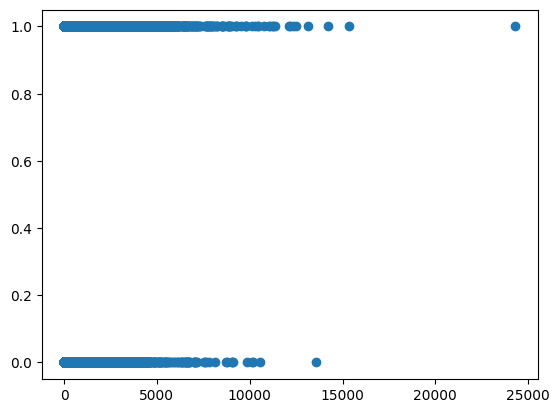

In [ ]:
x = df['num_orders']
y = df['homepage_featured']

plt.scatter(x, y)
plt.show()

In [ ]:
df_=df.copy()
for i in cat_var:
    df_[i] = pd.factorize(df_[i])[0]

In [ ]:
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics
%matplotlib inline

In [ ]:
X = df_.drop(['num_orders'], axis=1).values
y = df_['num_orders'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Root Mean Squared Error for LinearRegression:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for LinearRegression: 347.94362857453615


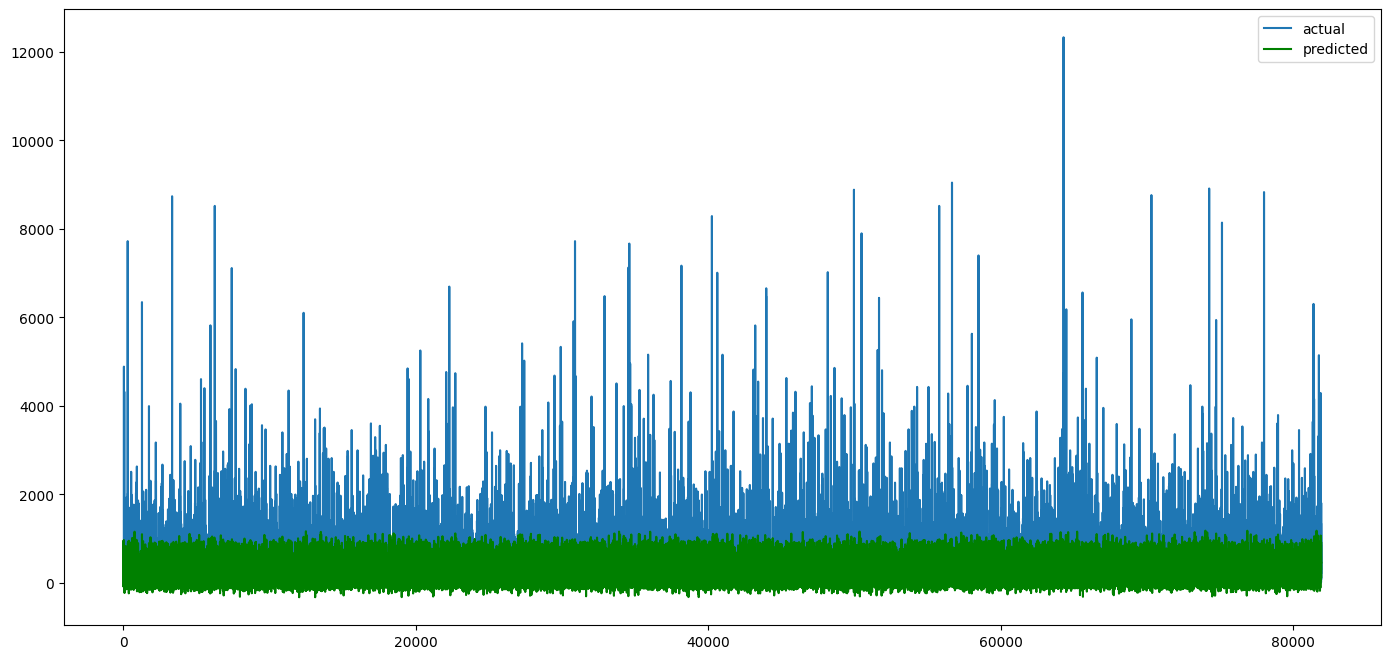

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Root Mean Squared Error for DecisionTree:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error for DecisionTree: 206.99100697510656


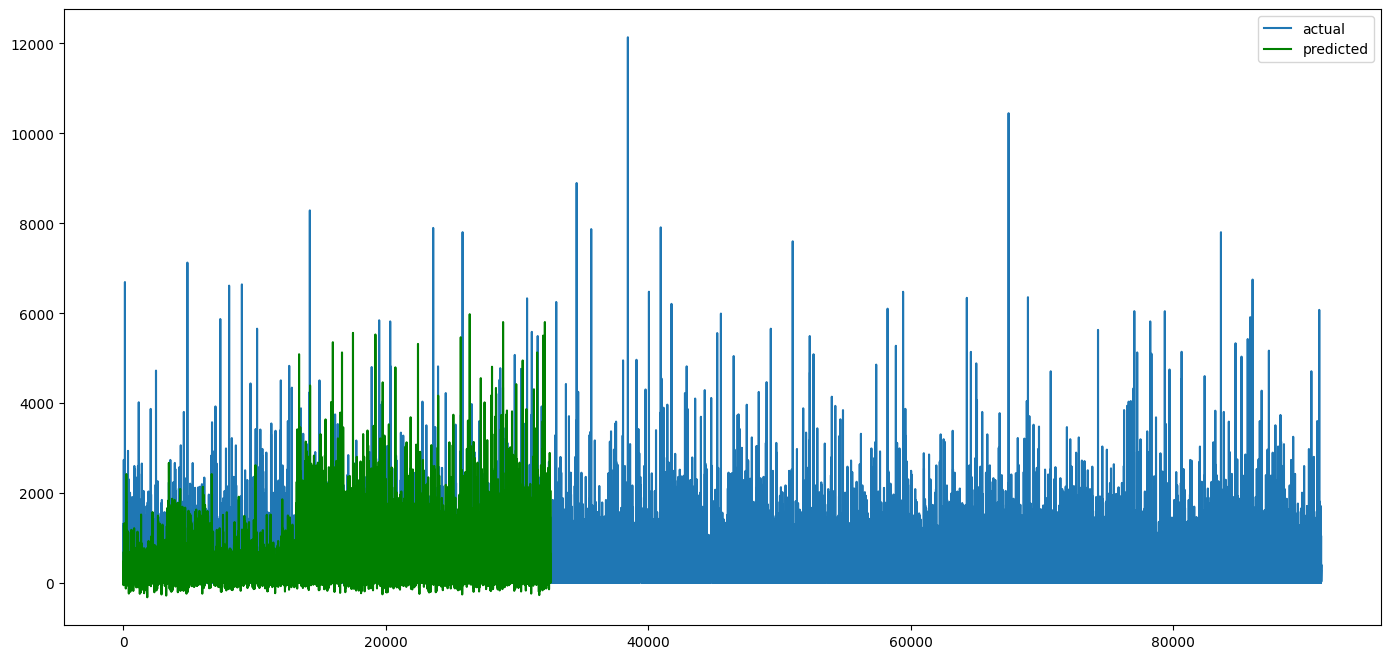

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)


In [ ]:
regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [ ]:
print('Root Mean Squared Error for rf:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Root Mean Squared Error for rf: 347.94362857453615


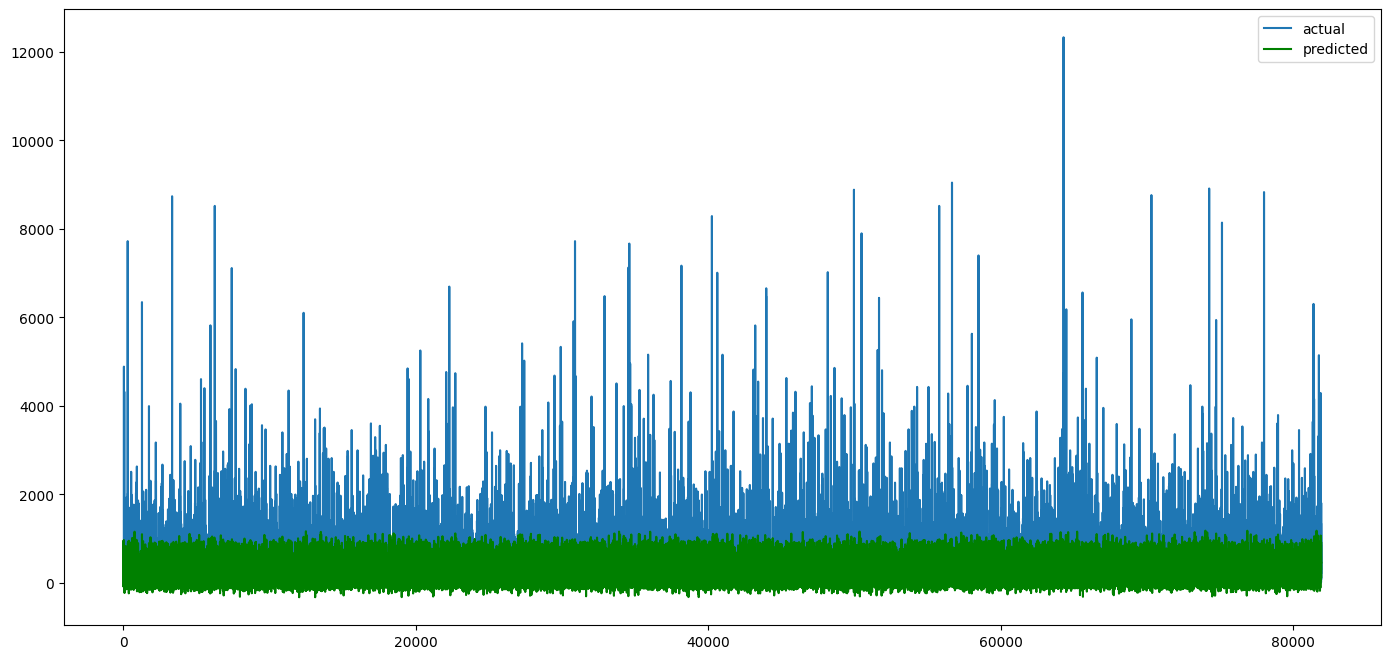

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[17:50:32] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



155.84780897619612


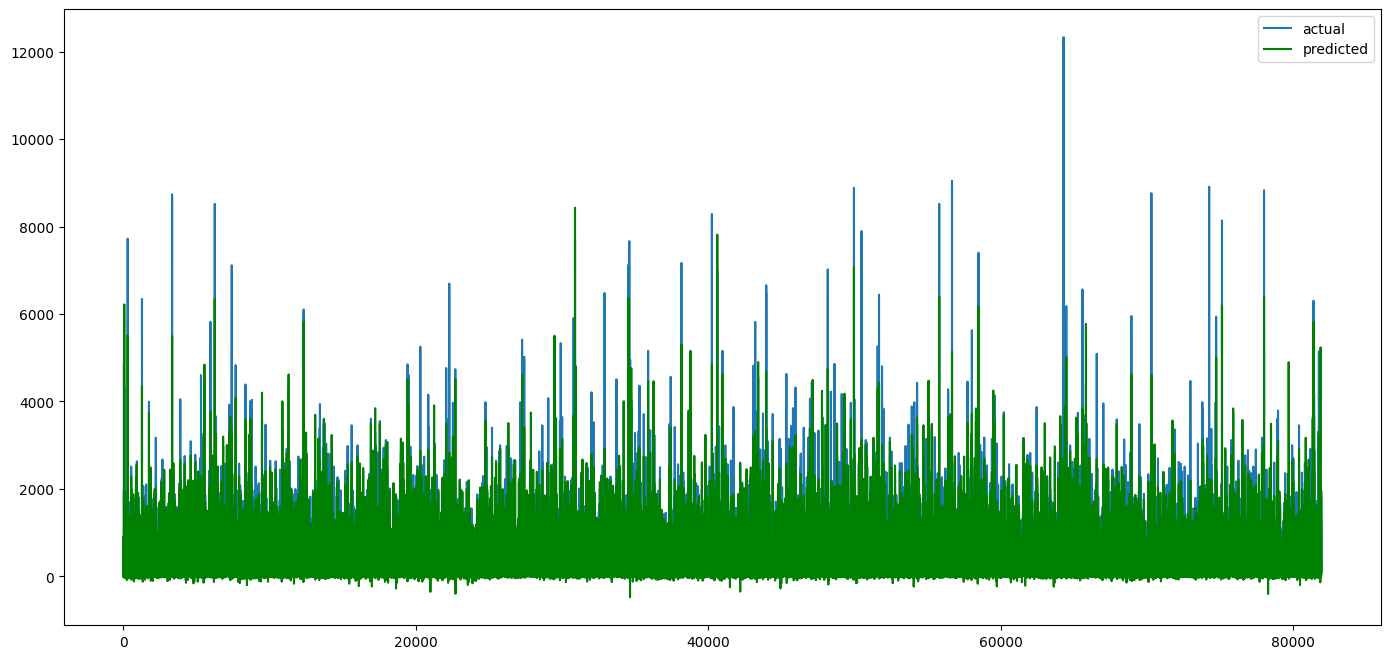

In [ ]:
#Trying to plot them all at once
from matplotlib import pyplot
pyplot.figure(figsize=(17, 8))
pyplot.plot(y_test, label="actual")
pyplot.plot(y_pred, color='green', label="predicted")
pyplot.legend(loc='best')
#pyplot.plot(predictions, color='red')
pyplot.show()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

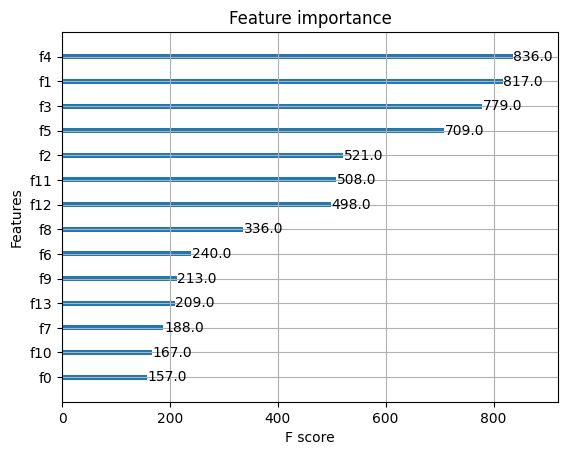

In [ ]:
xgb.plot_importance(xgb_model)

In [ ]:
training = df.loc[:, ['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders']]

In [ ]:
X_train = training.drop(['num_orders'], axis=1).values
y_train = training['num_orders'].values

In [ ]:
X_test = test_data.values

In [ ]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[09:39:38] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.



In [ ]:
ypred = pd.DataFrame(y_pred)
predictions = pd.merge(test_data, ypred, left_index=True, right_index=True, how='inner')
predictions['num_orders'] = predictions[0]
predictions = predictions.drop([0], axis=1)
ts_tot_pred = predictions.groupby(['week'])['num_orders'].sum()
ts_tot_pred = pd.DataFrame(ts_tot_pred)

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyoff
plot_data = [
    go.Scatter(
        x=ts_tot_orders.index,
        y=ts_tot_orders['num_orders'],
        name='Time Series for num_orders',
        marker = dict(color = 'Blue')
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=ts_tot_pred.index,
        y=ts_tot_pred['num_orders'],
        name='Predicted',
        marker = dict(color = 'Red')
        #x_axis="OTI",
        #y_axis="time",
    )

]
plot_layout = go.Layout(
        title='Total orders per week',
        yaxis_title='Total orders',
        xaxis_title='Week',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)